(sec:from_scratch_2)=
# 통계 기초

**참고** 

여기서 사용하는 코드는 조엘 그루스(Joel Grus)의 
[밑다닥부터 시작하는 데이터 과학](https://github.com/joelgrus/data-science-from-scratch) 
5장에 사용된 소스코드의 일부를 기반으로 작성되었다.

**주요 내용**

통계학에서 다루는 기초 개념과 기법이이 데이터 분석의 기본을 이룬다.
가장 중요한 통계의 기초 개념과 기법을 간단하게 소개한다.
다루는 주제는 다음과 같다.

- 중심경향성: 평균값, 중앙값, 최빈값
- 산포도: 분산, 표준편차, (사분)범위
- 상관관계: 공분산, 피어슨 상관관계
- 상관관계 대 인과관계

**필수 모듈**

`matplotlib.pyplot`은 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [1]:
import matplotlib.pyplot as plt

**matplotlib 한글 설정**

그래프에서 한글을 사용하기 위해 필요한 설정이다. 
윈도우, 우분투 등 운영체제에 따라 다른 설정을 지원한다. 
구글 코랩도 지원한다.

In [2]:
import platform
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정
if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # 우분투의 경우 아래 명령문이 최소 한번 실행했어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)

## 데이터 준비

어떤 웹사이트의 회원 204명을 대상으로 친구가 몇 명인지를 조사한 결과를 리스트로 저장하였다고 가정한다.
회원 아이디는 친구가 많은 순서대로 0, 1, 2, ... 등으로 정렬되어 있고,
리스트의 각 항목이 해당 회원의 친구 숫자이다.
회원의 친구 숫자는 최대 100명, 최소 1명이다.

In [3]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

리스트의 길이, 리스트에 포함된 항목의 최댓값과 최솟값을 이용해서 앞서 언급한 내용을 확인할 수 있다.

In [4]:
print(f"회원수:\t{len(num_friends)}명", 
      f"최대 친구 숫자:\t{max(num_friends)}명", 
      f"최소 친구 숫자:\t{min(num_friends)}명", sep='\n')

회원수:	204명
최대 친구 숫자:	100명
최소 친구 숫자:	1명


## 데이터 살펴보기

회원들의 친구 숫자 정보를 다양한 방식으로 파악할 수 있다.

**`collections.Counter` 클래스**

먼저 정해진 수의 친구를 갖는 회원은 몇 명인지 확인해보자.
이를 위해 `collections` 클래스의 `Counter` 클래스를 이용한다.

In [5]:
from collections import Counter

`Counter` 클래스는 사전 자료형인 `dict`의 자식 클래스이며,
`Counter` 클래스의 객체는 리스트, 튜플, 문자열 등 이터러블 자료형을 이용하여
생성한다.
생성된 사전은 이터러블 자료형에 포함된 항목의 사용 횟수를 카운트한 결과를 보관한다.

In [6]:
# Counter 객체 생성
friend_counts = Counter(num_friends)

생성된 객체는 리스트의 항목을 키로, 해당 항목이 사용된 횟수를 키값으로 갖는 
사전 자료형이다.

- 100명의 친구를 갖는 회원: 1명
- 49명의 친구를 갖는 회원: 1명
- ...
- 2명의 친구를 갖는 회원: 17명
- 1명의 친구를 갖는 회원: 22명

In [7]:
friend_counts

Counter({100: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

친구 숫자를 x축에, 해당 친구 숫자 만큼의 친구를 갖는 회원의 수를 y축으로 지정하고 히스토그램을 그려보자.

In [8]:
xs = range(101)                         # x축: 친구 숫자. 최소 1명에서 최대 100명.
ys = [friend_counts[x] for x in xs]     # y축: 지정된 수 만큼의 친구를 갖는 회원수

`matplotlib.pyplot` 모듈의 `bar()` 함수를 이용하여 x축과 y축에 사용될 값을 지정하면 히스토그램을 그린다.
그래프 그리기에 대해서는 {ref}`sec:visualization_1`와 {ref}`sec:visualization_2` 에서 보다 자세히 다룰 예정이다.

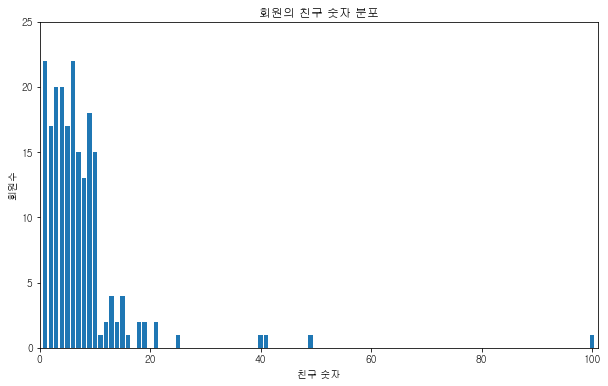

In [9]:
# 히스토그램 그래프 그리기
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("회원의 친구 숫자 분포")
plt.xlabel("친구 숫자")
plt.ylabel("회원수")
plt.show()

위 히스토그램에서 다음 두 가지를 한 눈에 알아볼 수 있다.

* 대다수 회원이 10명 이내의 친구를 갖는다.
* 100명의 친구를 가진 회원도 있다.

또 다른 정보를 어떻게 구할 수 있을까? 
언급한 대로 대다수 회원의 친구 숫자는 어딘가로 몰리는 경향이 있다.
이것을 전문용어로 표현하면 **중심 경향성**이다.
즉, 일반적으로 회원들의 친구 숫자를 대표하는 중심이 존재한다는 의미이다.

## 중심 경향성과 평균

중심 경향성은 데이터가 어떤 값을 중심으로 몰려 있는 현상을 의미하며 중심이 되는 값으로
보통 세 종류의 **평균**<font size='2'>average</font>을 사용한다.

- 평균값<font size='2'>mean</font>
- 중앙값<font size='2'>median</font>
- 최빈값<font size='2'>mode</font>

:::{admonition} 평균 vs. 평균값
:class: info

영어로 average와 mean은 모두 평균을 의미하는 동의어로 사용된다.
하지만 통계 분야에서 average는 숫자들의 집합(데이터셋)을 대표하는 어떤 값을 가리키는
일반 명사로 사용되며 정의 방식에 따라 다양한 종류의 average가 사용된다.
대표적으로 mean, median, mode 세 종류가 많이 사용된다.

이중에 mean은 일상에서 일반적으로 사용되는 평균값,
즉 주어진 값들을 모두 더한 다음 값들의 개수로 나눈 값을 가리킨다.
그런데 통계에서는 여러 종류의 mean을 사용하는데
대표적으로 산술 평균, 기하 평균, 조화 평균이 있다.
이중에 산술 평균이 앞서 설명한 평균값을 가리킨다.

여기서는 mean을 산술 평균, 즉 일반적으로 사용되는 평균값을 가리키는 값으로 사용한다. 
그리고 혼동을 피하기 위해 average는 평균으로, mean은 평균값으로 부른다.
:::

### 평균값

$X$가 임의의 데이터셋을, $n$은 $X$의 크기, 즉 데이터셋에 포함된 샘플, 즉 항목의 개수를 가리킨다고 가정하자.
**평균값**<font size='2'>mean</font>은 모든 데이터 샘플의 합을 데이터셋의 크기로 나눈 값이다.
평균값은 보통 그리스 알파벳 뮤($\mu$) 또는 $E(X)$로 표시하며 아래 식으로 계산된다.

$$
\mu = E(X) = \frac{\sum X}{n}
$$

:::{admonition} $\sum X$의 의미
:class: info

$\sum X$은 데이터셋 $X$에 포함된 모든 값들의 합을 가리킨다.
:::

**`mean()` 함수**

$X$가 웹사이트 회원의 친구 숫자로 이루어진 데이터셋 `num_friends`를 가리킬 때
회원들의 친구 숫자의 평균값이 7.33명임을 
아래 `mean()` 함수로 구할 수 있다.

- `sum()` 함수: 리스트, 튜플 등에 포함된 항목들의 합 반환
- `len()` 함수: 리스트, 튜플 등에 포함된 항목들의 개수 반환

In [10]:
def mean(xs):
    """
    xs: 리스트로 구현된 데이터셋
    """

    return sum(xs) / len(xs)

In [11]:
mean(num_friends)

7.333333333333333

### 중앙값

**중앙값**<font size='2'>median</font>은 데이터셋에 포함된 모든 데이터 샘플을
크기 순으로 정렬했을 때 중앙 위치에 자리잡은 값이다. 
데이터셋의 크기가 짝수인 경우 중앙에 위치한 두 수의 
평균값을 중앙값으로 사용한다. 
중앙값을 **중위수**라 부르기도 한다.

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/median.png" width="30%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Median">위키백과</a>&gt;</div></p>

**`median()` 함수**

웹사이트 회원들의 친구 수의 중앙값은 6임을 아래 `median()` 함수를 이용하여 확인한다.

In [12]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return median_odd(xs)

In [13]:
median(num_friends)

6.0

**평균값 대 중앙값**

평균값이 중앙값에 비해 데이터셋에 포함된 값들에 민감하다.
예를 들어, `num_friends`에서 최대 친구 숫자를 100명에서 200명으로 바꾸면
그러면 평균값은 7.33명에서 7.82명으로 올라간다.

In [14]:
Y = num_friends.copy()
Y[0]=200
mean(Y)

7.823529411764706

하지만 중앙값은 변하지 않는다.

In [15]:
median(Y)

6.0

**이상치와 중앙값**

앞서 살펴보았듯 평균값은 데이터셋의 특정 샘플에 민감하게 반응한다. 
`num_friends`의 경우 친구 숫자의 평균값이 7.33명인데 100명의 친구가 있는 경우는 매우 특이하다고 할 수 있다.
이런 데이터 샘플을 **이상치**<font size='2'>outlier</font>라 부른다. 
평균값은 이상치의 민감하게 반응해서, 데이터셋에 대한 잘못된 정보를 전달할 수 있다. 

예를 들어, [2013년 3월 당시, 국회의원들의 평균재산은 94억 9000만원](https://www.datadata.link/qa08/)이었다.
하지만 이상치값을 보인 두 의원을 제외하면 23억 3000만원이다. 
현대중공업의 대주주인 정몽준의 약 1조 9249만원 가량의 재산과 고희선 의원의 1984억원의 재산 두 이상치 
포함 여부에 따라 당시 국회의원들의 평균 재산이 매우 많이 달라졌다.

**중앙값과 사분위수**

중앙값은 데이터 샘플을 모두 순서대로 정렬했을 때 중앙 위치에 있는 값이며, 
세 개의 **사분위수**<font size='2'>quantile</font> 중에 하나이다.
다른 두 개의 사분위수는 하위 25% 위치에 있는 제1사분위수와
상위 25% 위치에 있는 제3사분위수이다. 
즉, 중앙값은 상위 50%에 해당하는 제2사분위수에 해당한다.

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/quantile.png" width="50%"></div>

**`quantile()` 함수**

`num_friends`의 제1사분위수와 제3사분위수는 각각 3명과 9명임을 `quantile()` 함수를 이용하여 확인할 수 있다.

In [39]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 상위 p% 위치
    """
    
    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

In [40]:
print("제1사분위수:", quantile(num_friends, 0.25))
print("제3사분위수:", quantile(num_friends, 0.75))

제1사분위수: 3
제3사분위수: 9


### 최빈값

데이터셋에 포함된 데이터 샘플 중에서 가장 많이 출현하는 값이 **최빈값**<font size='2'>mode</font>이다.
평균값, 중앙값과는 다르게 여러 개의 최빈값이 존재할 수 있다.

**`mode()` 함수**

`num_friends`의 최빈값은 1과 6임을 `mode()` 함수를 이용하여 확인한다.

- `Counter` 객체를 생성하여 키값이 최대가 되는 키를 찾는다.

In [18]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

In [19]:
mode(num_friends)

{1, 6}

## 산포도와 분산

**산포도**는 데이터가 퍼져있는 정도를 측정한다. 
산포도가 0에 가까운 값이면 퍼져있지 않고 한 값 주위에 뭉쳐있다는 의미이고,
반대로 0보다 클 수록 퍼져있는 정도가 커진다는 의미이다. 
산포도를 측정하는 기준은 보통 아래 네 가지를 사용한다.

* 범위
* 사분범위
* 분산
* 표준편차

### 범위

**범위**<font size='2'>range</font>는 데이터셋에 포함된
데이터 샘플의 최대값과 최소값의 차이를 가리킨다. 
즉, 범위는 데이터 샘플의 최대, 최소값에만 의존한다. 
예를 들어, 최대값이 100, 최소값이 1인 데이터셋은 모두 `num_friends`와 동일한 범위를 갖는다.
이런 이유로 범위가 데이터셋의 산포도 특성을 제대로 반영하지 못할 수도 있다.

**`data_range()`** 함수

`num_friends`의 범위가 99임을 아래 `data_range()` 함수를 이용하여 확인한다.

In [41]:
def data_range(xs):
    return max(xs) - min(xs)

In [42]:
data_range(num_friends)

99

### 사분범위

평균, 분산, 표준편차와 함께 범위도 이상치에 민감하다.
데이터의 산포도를 보다 안정적으로 측정하기 위해 제1사분위수와 제3사분위수 사이의 범위인 
**사분범위**<font size='2'>interquantile range</font>를 사용하기도 한다. 

**`iqr()` 함수**

아래 `iqr()` 함수를 이용해서 `num_friends`의 사분범위가 6임을 확인한다.
범위가 99였던 것에 비해 매우 사분범위를 기준으로 보면 산포도가 훨씬 작다.

In [43]:
def iqr(xs):
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [44]:
iqr(num_friends)

6

### 분산

**분산**<font size='2'>variance</font>은 데이터가 평균값<font size='2'>mean</font>을 중심으로
얼마나 퍼져있는가를 측정한다. 
다음과 같이 평균값과의 오차의 제곱의 평균값으로 계산된다.
데이터셋 $X$의 분산은 보통 $\sigma$ 또는 $\textit{Var}(X)$로 나타낸다.

$$
\sigma = \textit{Var}(X) = \frac{\sum (X - \mu)^2}{n-1}
$$

:::{admonition} 분모 $(n-1)$의 의미
:class: info

$\sum (X - \mu)$는 데이터셋 $X$에 포함된 모든 값들에 대해 평균값과의 오차의 제곱의 합을 가리킨다.

분산을 계산할 때 일반적으로 데이터셋의 크기 $n$으로 나눈다.
하지만 표본 데이터를 이용하여 (일반적으로 알지 못하는) 전체 데이터셋에 대한 분산을 추정하는 
경우 $(n-1)$을 사용한다.
실제로 데이터 분석에서 다루는 데이터는 거의 표본 데이터이다.
:::

**`var()` 함수**

데이터셋의 분산을 계산하는 `var()` 함수를 정의하기 위해
{ref}`sec:from_scratch_1`에서 정의한 내적 함수 `dotV()`를 활용한다.

In [46]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

In [45]:
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

`num_friends` 데이터의 분산값은 81.54이다.

In [47]:
var(num_friends)

81.54351395730716

### 표준편차

분산을 계산하기 위해 평균값과의 오차의 제곱을 사용한다.
따라서 계산된 분산의 단위는 원래 데이터에 사용된 단위의 제곱이며
값도 매우 커질 수 있다.
이런 이유로 분산의 제곱근인 
**표준편차**<font size='2'>standard deviation</font>를 
분산 대신 사용하곤 한다.

표본의 표준편차를 나타내는 기호는 보통 $s$이다.
$s_X$에 사용된 아랫첨자 $X$는 데이터셋을 명기할 때 사용한다.

$$s_X = \sqrt{\textit{Var}(X)}$$

**`std()` 함수**

`num_friends`의 표준편차는 9.03임을 아래 `std()` 함수가 계산한다.

- `math` 모듈의 `sqrt()` 함수: 제곱근 계산

In [48]:
import math

def std(xs):
    return math.sqrt(var(xs))

In [49]:
std(num_friends)

9.03014473623248

:::{admonition} 이상치와 분산/표준편차
:class: info

분산과 표준편차가 평균값에 의존한다.
따라서 평균값이 이상치에 영향을 받는만큼 분산과 표준편차도 영향을 받는다.
:::

## 상관관계

두 데이터셋이 서로 상관이 있는가를 알고자 할 때 상관관계를 파악하며, 
상관관계의 정도는 보통 공분산(covariance) 또는 피어슨 상관계수(correlation)로 측정한다. 

예를 들어, 회원가 사이트에서 보내는 시간과 친구 숫자 사이의 연관성을 파악하고자 한다.

In [29]:
print(num_friends)

[100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

`num_friends`와 `daily_minutes`는 각각 
회원별 친구 숫자와 사이트에서 머무르는 시간을 순서에 맞게 데이터로 담고 있다.

### 공분산

두 데이터셋의 공분산은 각 데이터넷의 변수가 각각의 평균값으로부터 떨어져 있는 정도를 계산하며,
수식은 다음과 같다. 
두 데이터셋 $X$와 $Y$를 크기를 $n$이라 하자.
그러면, $X$와 $Y$의 공분산 $Cov(X, Y)$는 다음과 같다.

$$
Cov(X,Y) = \frac{\sum (X- E(X))(Y- E(Y))}{n-1}
$$

친구 숫자와 사용시간 사이의 공분산은 22.43이다.

In [31]:
def covariance(xs, ys):
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

**공분산의 특징과 한계**

어떤 회원에 대해 친구 숫자와 사용시간 모두 평균보다 작거나 모두 크면 공분산에 양수의 값이 더해진다.
반면에 친구 숫자가 평균보다 작지만, 사용시간은 평균보다 크면 음수의 값이 공분산에 더해진다. 
따라서 친구 숫자와 사용시간이 평균을 기준으로 동일한 방향(크거나 작다 기준)이냐 아니냐가 공분산 값에 영향을 미친다.

그런데 친구 숫자는 그대로인데 사용시간만 늘면 공분산은 증가한다. 
하지만 그렇다고 해서 친구 숫자와 사용시간의 연관성이 어떻게 변한 것인지를 판단하기는 어렵다.
즉, 공분산이 크다, 작다의 기준을 잡기가 어렵다. 

### 피어슨 상관계수

공분산의 한계를 해결하기 위해 피어슨 상관계수가 제시되었다. 
피어슨 상관계수는 공분산을 각 데이터셋의 표준편차의 곱으로 나누어
두 데이터셋 사이의 **선형** 상관관계를 수치로 계산한다.

두 데이터셋 $X, Y$의 피어슨 상관계수 계산은 다음과 같다.

$$
Correl(X,Y) = \frac{Cov(X,Y)}{s_X \cdot s_Y}
$$

**피어슨 상관계수의 특징**

* 피어슨 상관계수는 -1과 1 사이의 실수이다.
* 1에 가까울 수록 양의 선형관계가 성립한다.
* -1에 가까울 수록 음의 선형관계가 성립한다.
* 0에 가깔울 수록 선형관계가 약해진다.

<img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/Correlation.png" width="70%">

출처: [위키백과](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

친구 숫자와 사용시간 사이의 상관관계는 0.25이며, 
이는 두 데이터셋 사이의 상관 정도가 크지 않음을 의미한다. 

In [32]:
def correlation(xs, ys):
    """공분산 계산"""
    stdev_x = std(xs)
    stdev_y = std(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

correlation(num_friends, daily_minutes)

0.24736957366478218

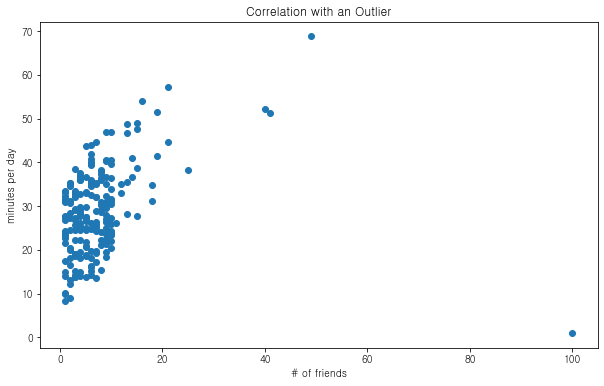

In [33]:
plt.scatter(num_friends, daily_minutes)

plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

**이상치와 상관관계**

이상치가 상관관계에도 영향을 준다. 

위 예제에서 100명의 친구를 가진 회원의 사이트 사용시간이 1분이며,
이 회원의 데이터는 확실히 이상치라고 할 수 있다. 
이제 이 회원의 데이터를 제거하고 상관관계를 계산하면, 이번에는 상관계수가 0.57이 된다.
두 데이터셋의 상관정도가 두 배이상 커졌다.

In [34]:
outlier = num_friends.index(100)    # 이상치의 인덱스

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

이상치의 존재여부에 따른 두 데이터셋의 그래프도 모양이 달라지며,
이상치를 제거한 후의 그래프의 선형 상관관계가 보다 명확하게 보여진다.

**이상치 제거 후**

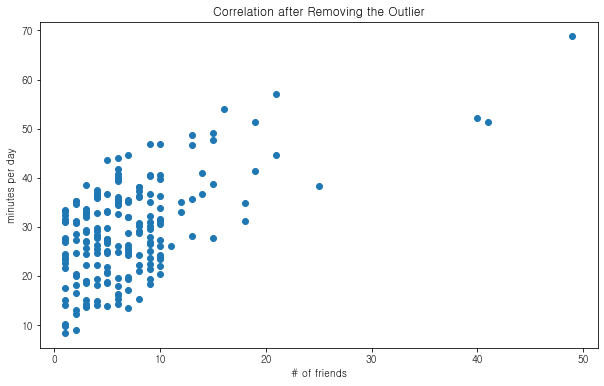

In [35]:
plt.scatter(num_friends_good, daily_minutes_good)

plt.title("Correlation after Removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

## 상관계수 관련 추가 주의사항

상관관계가 0 또는 1에 아주 가깝다고 해서 반드시 어떤 관계도 없다거나 
매우 밀접합 선형관계이다라고 섣부르게 결론 내리면 위험하다. 

**예제 1**

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
</table>

x와 y의 상관계수는 0이다. 

In [36]:
x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

correlation(x,y)

0.0

하지만 y는 x의 항목의 절댓값을 항목으로 갖는다. 
즉, 이런 데이터는 상관계수로 두 데이터셋의 연관성을 측정할 수 없다.

**예제 2**

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>99.98</td>
    <td>99.99</td>
    <td>100</td>
    <td>100.01</td>
    <td>100.02</td>
</tr>
</table>

x와 y의 상관계수는 1이다. 

In [37]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

correlation(x,y)

1.0

하지만 두 데이터셋 사이의 선형관계가 정말로 완벽하게 선형인지에 대해서는 장담할 수 없다.

## 상관관계와 인과관계

두 데이터셋 사이에 상관관계가 있다고 해서 한 쪽이 다른 쪽에 영향을 주는 인과관계가 있다고 주장할 수 없다. 
왜냐하면 두 데이터셋에 영향을 주는 다른 외부 요소가 존재할 수 있기 때문이다.

예를 들어, 친구 숫자를 담은 `num_friends`와 사이트 사용시간을 담은 `daily_minutes`의 관계를 살펴보자.
그러면 최소 세 가지 시나리오가 가능하다.

1. 사이트에서 많은 시간을 보낼 수록 많은 친구를 사귄다.
1. 많은 친구가 있으니까 사이트에서 시간을 보다 많이 보낸다.
1. 사이트에서 많은 정보를 얻을 수 있으니까 사용시간이 길어지고, 그러다 보니까 친구가 늘어난다.

이 중에 어떤 것이 맞는지는 다른 방법으로 확인해봐야 한다. 
예를 들어, 회원 집단을 임의로 두 모둠으로 나누고, 한쪽 모둠에만 특정 친구들의 글만 보여주는 것과 같이,
한 쪽 모둠에만 영향을 주는 실험을 하고 그 결과를 비교한다.
이런 식으로 해서 상관관계의 진짜 근거를 얻어내도록 해야 한다.

## 연습문제

참고: [(실습) 통계 기초](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-from_scratch_2.ipynb)